In [3]:
#### Agglomeration of communities ####

import pandas as pd 
import os 
from datetime import datetime 
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


C:\Users\jhroe\AppData\Local\Temp\ipykernel_18304\571033510.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Find datafile
file = 'Rphenograph_output_275clusters_k250_16ct_fractions.csv'

# Get current directory
path = os.getcwd()
data_path = path + '/Data/'

# Set path 
output_dir = f"{data_path}/clustering/"

data = pd.read_csv(f"{data_path}/phenograph_output/{file}", index_col=0)

# rename cells to be consistent
ct_order = ['Cl Mo','Int Mo', 'Non-Cl Mo', 'DC',  'Neutrophil', 'T other', 'Tc', 'Th', 'Treg', 'Unknown']

# Harmonize cell type names and get rid of spaces
data['source_cluster'] = data['source_cluster'].replace({'T other':'T_other','Non-Cl Mo':'Non-Cl_Mo','Int Mo':'Int_Mo','Cl Mo':'Cl_Mo','Cl MAC':'Cl_Mac','Alt MAC':'Alt_Mac', 'NK cell':'NK','DCs cell':'DC','Neutrophils':'Neutrophil','B cell': 'B', 'Endothelial cell': 'Endothelial', 'Mast cell':'Mast'})
data.rename(columns={'T.other':'T_other','Non.Cl.Mo':'Non-Cl_Mo','Int.Mo':'Int_Mo','Cl.Mo':'Cl_Mo','Cl.MAC':'Cl_Mac','Alt.Mac':'Alt_Mac', 'DCs.cell':'DC', 'Mast.cell':'Mast', 'Endothelial.cell': 'Endothelial', 'B.cell': 'B', 'NK.cell': 'NK', 'Neutrophils':'Neutrophil'}, inplace=True)
data.to_csv(f"{data_path}/clustering/full_cd_275c_renamed.csv", index = False)
# df_clus.to_csv(f"{data_path}/clustering/full_cd_clus_19_39_48.csv", index = False)

df = data.iloc[:,3:]


In [3]:
data

,Patient_ID,source_ID,source_cluster,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,...,Mast,NK,Neutrophil,Non-Cl_Mo,T_other,Tc,Th,Treg,Unknown,cluster
1,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1
2,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2
3,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3
4,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4
5,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44
1637719,LUAD_D416,D416_996,Cl_Mac,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72
1637720,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146
1637721,LUAD_D416,D416_998,Cl_Mac,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1


In [4]:
# colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#42d4f4', '#f032e6', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#000075', '#a9a9a9', '#000000']
# cts = ['Alt MAC', 'B cell', 'Cancer', 'Cl MAC', 'Cl Mo', 'DCs cell', 'Endothelial cell', 'Int Mo', 'Mast cell', 'NK cell', 'Neutrophils','Non-Cl Mo', 'T other', 'Tc', 'Th', 'Treg', 'Unknown'][::-1]
ct_order = ['Cancer', 'Endothelial',   'Alt_Mac', 'Cl_Mac', 'Cl_Mo','Int_Mo', 'Non-Cl_Mo', 'DC',  'Neutrophil','Mast', 'NK', 'B', 'T_other', 'Tc', 'Th', 'Treg', 'Unknown']
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'maroon', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'olive', 'brown', 'navy', 'aqua', 'teal']
cell_type_colors = {
    'Cancer': '#FF0000',             # Red
    'Alt_Mac': '#0000FF',            # blue 
    'Cl_Mac': '#4169E1',             # blue
    'Cl_Mo': '#0096FF',              # blue
    'Int_Mo': '#00FFFF',             # ''
    'Non-Cl_Mo': '#87CEEB',          # ''
    'Mast': '#FFFF00',          # Yellow
    'B': '#C4A484',             # brown
    'DC': '#6A0DAD',           # purple
    'Endothelial': '#FFA500',   # Orange
    'NK': '#FFC0CB',            # pink
    'Neutrophil': '#FF00FF',        # magenta
    'T_other': '#66CDAA',            # green
    'Tc': '#008000',                 # Green
    'Th': '#2E8B57',                 # Green (similar to 'Tc')
    'Treg': '#3CB371',               # Green
    'Unknown': '#808080'             # Gray
}

In [5]:
#### Agglomerative clustering function ####

def agglomerative_clustering(k, average_neighbours, avg_noCluster, agglomerate_to):
    
    # Agglomerative clustering to chosen number of communities as determined by own biological knowledge of the data
    ac1 = AgglomerativeClustering(linkage = 'average', n_clusters = agglomerate_to)
    agglomerate1 = pd.DataFrame(ac1.fit_predict(avg_noCluster))
    # Rename column
    agglomerate1.columns = [f"agglomerateto_{agglomerate_to}"]
    agglomerate1[f"agglomerateto_{agglomerate_to}"] += 1
    # Add agglomerated data to average neighbours 
    average_neighbours = average_neighbours.join(agglomerate1)
   
    print(list(average_neighbours))
    
    # Save data with added columns 
    average_neighbours.to_csv(f"{data_path}clustering/reclustered_{agglomerate_to}.csv", index = False)
    print('dataset saved')

    return pd.DataFrame(average_neighbours)

In [6]:
# Create average_neighbours
centroid_noclus = df.groupby('cluster').mean()
centroids = centroid_noclus.reset_index()
centroid_noclus.head()

,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,Int_Mo,Mast,NK,Neutrophil,Non-Cl_Mo,T_other,Tc,Th,Treg,Unknown
cluster,,,,,,,,,,,,,,,,,
1,0.085663,0.010717,0.040616,0.143817,0.062591,0.002432,0.131348,0.015393,0.011515,0.003445,0.034961,0.022557,0.034208,0.117220,0.141745,0.025527,0.116247
2,0.003646,0.003702,0.334013,0.002275,0.003273,0.000574,0.002638,0.002528,0.003647,0.002055,0.003128,0.004897,0.003203,0.002035,0.420507,0.004465,0.203414
3,0.012124,0.010918,0.326119,0.089795,0.028495,0.000671,0.135682,0.007079,0.008431,0.002074,0.027054,0.014065,0.021714,0.099835,0.129510,0.017051,0.069384
4,0.000000,0.000000,0.712945,0.000000,0.000000,0.000946,0.143528,0.000095,0.000063,0.000386,0.000000,0.000000,0.000000,0.000060,0.000129,0.000060,0.141788
5,0.015474,0.238088,0.012543,0.067240,0.019961,0.001229,0.067673,0.002951,0.005538,0.002372,0.011482,0.005413,0.019075,0.135105,0.312429,0.029650,0.053776


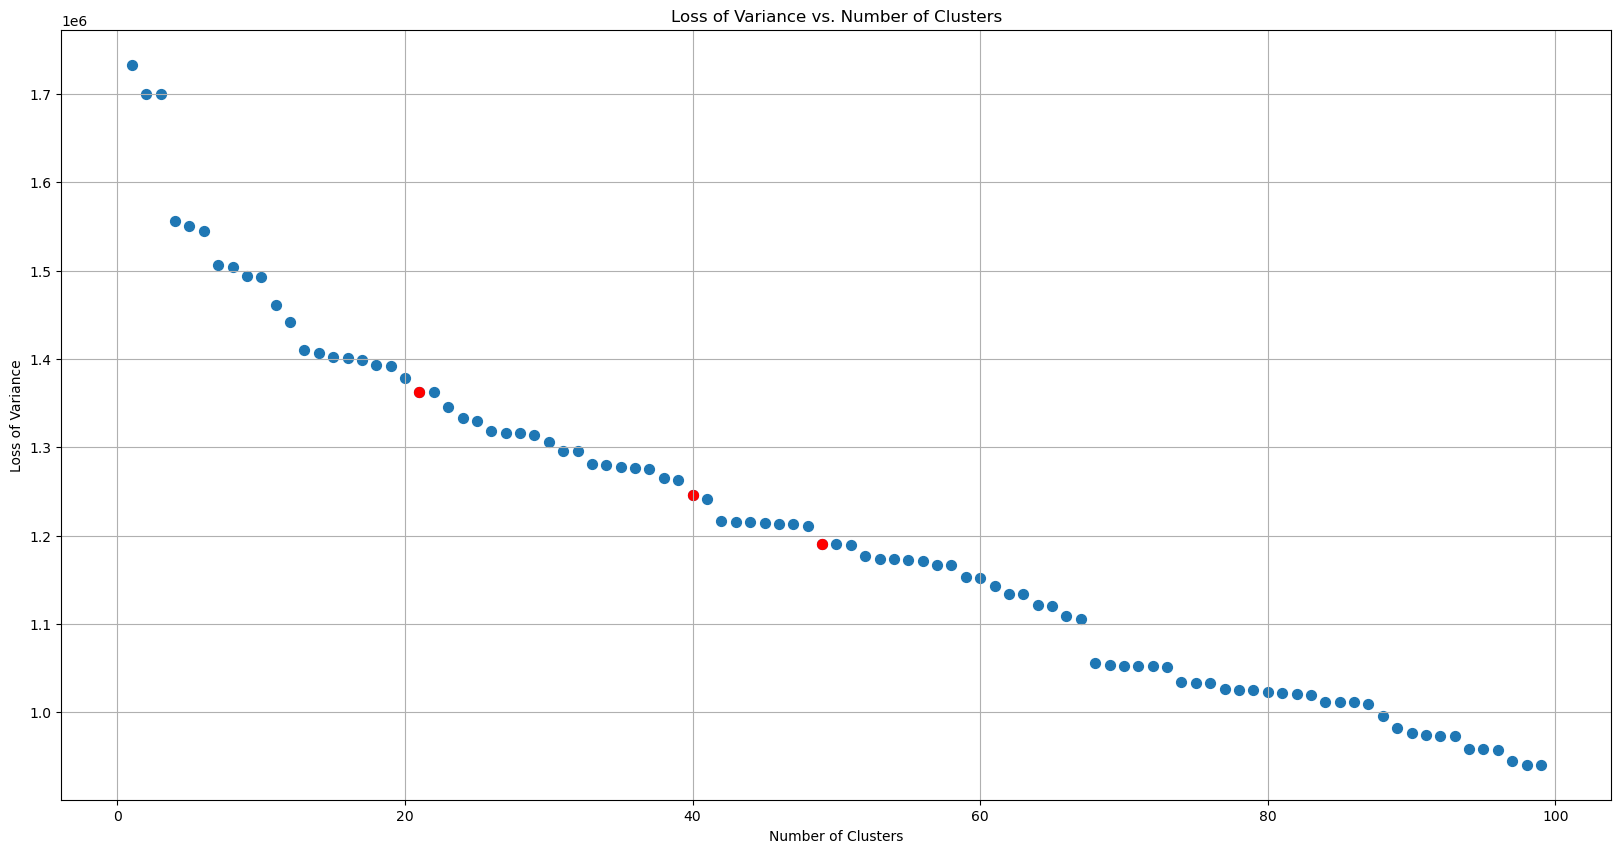

In [8]:
# Function to calculate the loss of variance
def calculate_loss_of_variance(clusters, data):
    loss = 0
    for cluster_id in np.unique(clusters):
        cluster_data = data.loc[clusters == cluster_id, data.columns != 'Cluster']
        centroid = cluster_data.mean(axis=0)
        cluster_loss = np.sum(pairwise_distances(cluster_data, [centroid])**2)
        loss += cluster_loss
    return loss

# Perform agglomerative clustering
n_clusters_range = range(1, 100)  # Define a range of cluster numbers to try
losses = []
num_clusters_left = []

for n_clusters in n_clusters_range:
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(centroids.iloc[:,1:])
    loss = calculate_loss_of_variance(clusters, centroids)
    losses.append(loss)
    num_clusters_left.append(n_clusters)

plt.figure(figsize=(20, 10))

# Plotting loss of variance after every merge
plt.scatter(num_clusters_left, losses, marker='o', s=50)

# Highlight chosen points
plt.scatter(num_clusters_left[20], losses[20], marker='o', s=50,color='red')
plt.scatter(num_clusters_left[39], losses[39], marker='o', s=50,color='red')
plt.scatter(num_clusters_left[48], losses[48], marker='o', s=50,color='red')


plt.xlabel('Number of Clusters')
plt.ylabel('Loss of Variance')
plt.title('Loss of Variance vs. Number of Clusters')
plt.grid(True)
plt.savefig(f'{data_path}clustering_plots/Loss_var__clusno.png', bbox_inches='tight', dpi=300)

plt.show()
# Significant drops in variance occur at merging to 19, 39 and 48

['cluster', 'Alt.MAC', 'B', 'Cancer', 'Cl_Mac', 'Cl_Mo', 'DC', 'Endothelial', 'Int_Mo', 'Mast', 'NK', 'Neutrophil', 'Non-Cl_Mo', 'T_other', 'Tc', 'Th', 'Treg', 'Unknown', 'agglomerateto_2']
dataset saved


,cluster,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,Int_Mo,Mast,NK,Neutrophil,Non-Cl_Mo,T_other,Tc,Th,Treg,Unknown,agglomerateto_2
0,1,0.085663,0.010717,0.040616,0.143817,0.062591,0.002432,0.131348,0.015393,0.011515,0.003445,0.034961,0.022557,0.034208,0.117220,0.141745,0.025527,0.116247,1
1,2,0.003646,0.003702,0.334013,0.002275,0.003273,0.000574,0.002638,0.002528,0.003647,0.002055,0.003128,0.004897,0.003203,0.002035,0.420507,0.004465,0.203414,1
2,3,0.012124,0.010918,0.326119,0.089795,0.028495,0.000671,0.135682,0.007079,0.008431,0.002074,0.027054,0.014065,0.021714,0.099835,0.129510,0.017051,0.069384,1
3,4,0.000000,0.000000,0.712945,0.000000,0.000000,0.000946,0.143528,0.000095,0.000063,0.000386,0.000000,0.000000,0.000000,0.000060,0.000129,0.000060,0.141788,1
4,5,0.015474,0.238088,0.012543,0.067240,0.019961,0.001229,0.067673,0.002951,0.005538,0.002372,0.011482,0.005413,0.019075,0.135105,0.312429,0.029650,0.053776,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,271,0.000000,0.000000,0.846152,0.000000,0.000000,0.000000,0.153848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
271,272,0.000000,0.000000,0.941716,0.000000,0.000000,0.000000,0.000072,0.000000,0.000000,0.000000,0.000000,0.000078,0.000072,0.000000,0.057989,0.000074,0.000000,1
272,273,0.000000,0.000000,0.937389,0.000000,0.000111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000111,0.000000,0.062389,0.000000,0.000000,0.000000,1
273,274,0.000000,0.084654,0.914201,0.000000,0.000074,0.000069,0.000000,0.000000,0.000078,0.000287,0.000131,0.000000,0.000000,0.000000,0.000045,0.000000,0.000461,1


In [13]:
# Agglomerate to 19 communities 
average_neighbours21= agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 21)
# # Agglomerate to 39 communities 
average_neighbours40 = agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 40)
# Agglomerate to 48 communities 
average_neighbours49 = agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 49)

average_neighbours49

cl_no = [21,40,49]

['cluster', 'Alt.MAC', 'B', 'Cancer', 'Cl_Mac', 'Cl_Mo', 'DC', 'Endothelial', 'Int_Mo', 'Mast', 'NK', 'Neutrophil', 'Non-Cl_Mo', 'T_other', 'Tc', 'Th', 'Treg', 'Unknown', 'agglomerateto_21']
dataset saved
['cluster', 'Alt.MAC', 'B', 'Cancer', 'Cl_Mac', 'Cl_Mo', 'DC', 'Endothelial', 'Int_Mo', 'Mast', 'NK', 'Neutrophil', 'Non-Cl_Mo', 'T_other', 'Tc', 'Th', 'Treg', 'Unknown', 'agglomerateto_40']
dataset saved
['cluster', 'Alt.MAC', 'B', 'Cancer', 'Cl_Mac', 'Cl_Mo', 'DC', 'Endothelial', 'Int_Mo', 'Mast', 'NK', 'Neutrophil', 'Non-Cl_Mo', 'T_other', 'Tc', 'Th', 'Treg', 'Unknown', 'agglomerateto_49']
dataset saved


In [1]:
average_neighbours2

NameError: name 'average_neighbours2' is not defined

In [111]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
average_neighbours2 = agglomerative_clustering(range(2,centroids.cluster.max()), centroids, centroid_noclus, 2)
average_neighbours2


df_cl = average_neighbours2
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data, key, on='cluster', how='inner').drop(columns=['cluster', 'Patient_ID', 'source_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)

C:\Users\jhroe\AppData\Local\Temp\ipykernel_6180\1119991350.py:16: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]


<Figure size 2000x1000 with 0 Axes>

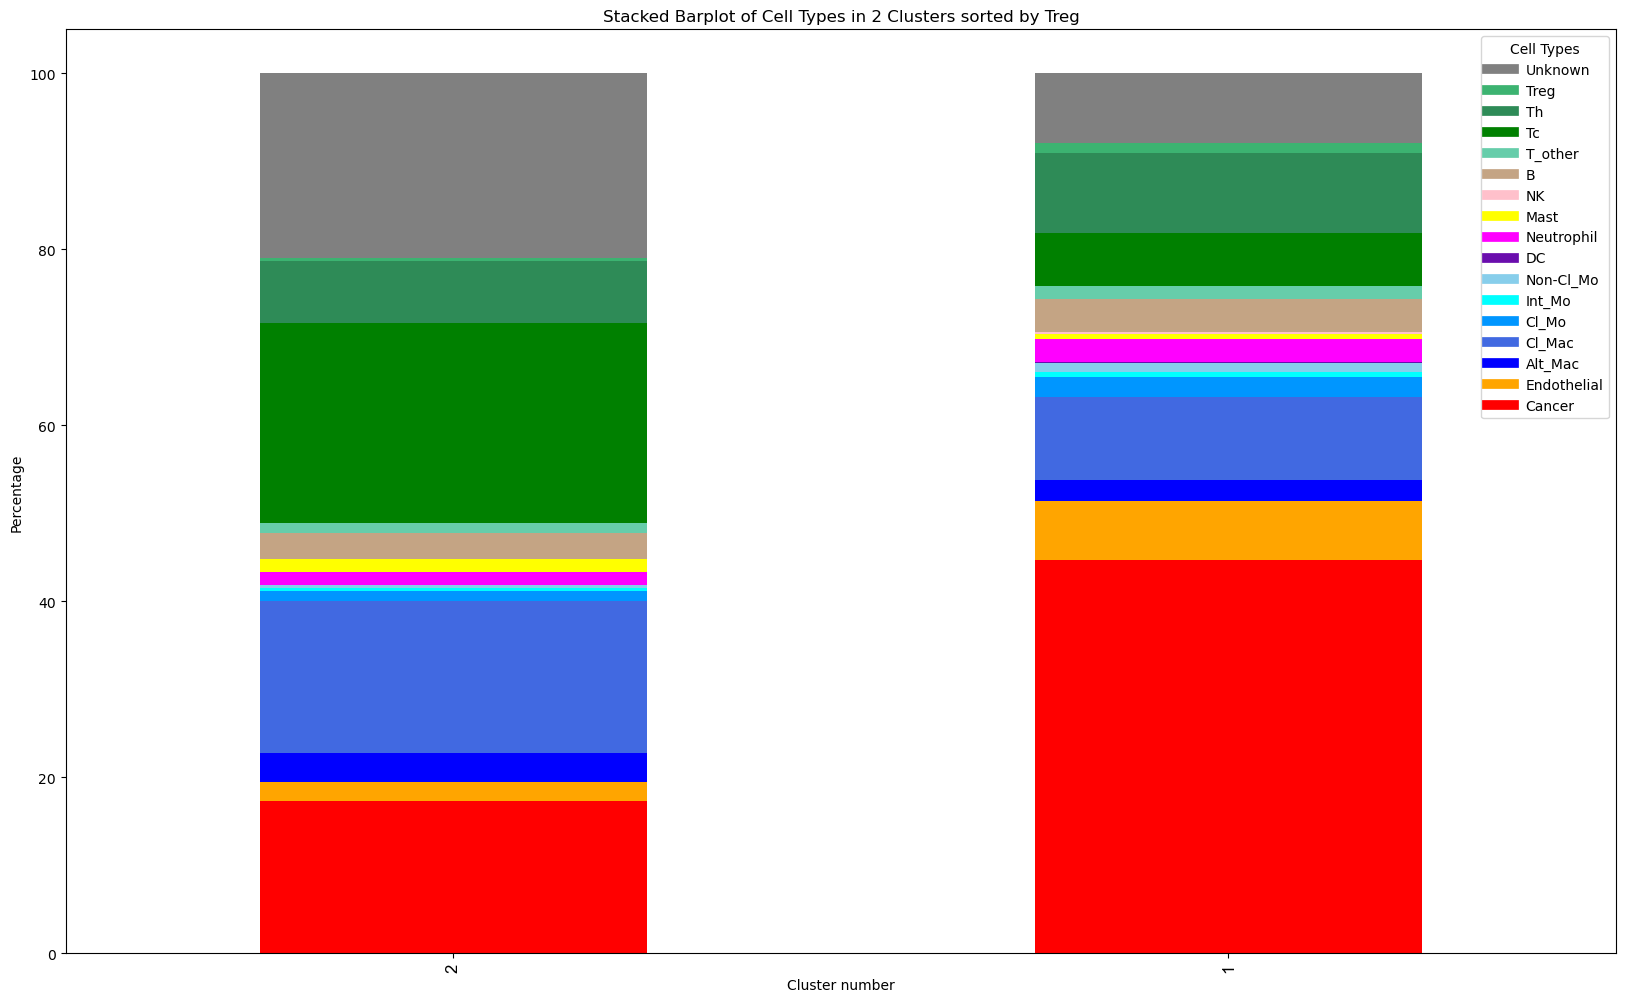

In [112]:
# specify cell type on which to sort
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)

# Add totals for each cell type and each cluster and calculate percentages
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()
result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]
result_percentage = result_percentage.iloc[:-1,:-1].T.reindex(columns=ct_order)

# Plotting
plt.figure(figsize=(20, 10))
ax = result_percentage.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=cell_type_colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=45, fontsize=5)

# Define the order of legend entries
handles = [plt.Line2D([0], [0], color=cell_type_colors[ct], lw=7) for ct in ct_order[::-1]]
labels = ct_order[::-1]

# Show plot
plt.legend(handles, labels, title='Cell Types', bbox_to_anchor=(1, 1))
plt.savefig(f'{data_path}clustering_plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)
plt.show()

In [16]:
df_loc = pd.read_csv(f"{data_path}/celldata/celldata_20240506.csv")[['cellID', 'Location_Center_X', 'Location_Center_Y']].rename(columns={'cellID': 'source_ID', 'cluster': 'agglomerateto_275'})
df_loc

,source_ID,Location_Center_X,Location_Center_Y
0,D001_0,93,159
1,D001_1,74,186
2,D001_2,167,131
3,D001_3,134,116
4,D001_4,142,122
...,...,...,...
1640312,D416_2881,281,879
1640313,D416_2882,385,907
1640314,D416_2883,363,992
1640315,D416_2884,357,994


In [15]:
data

,Patient_ID,source_ID,source_cluster,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,...,Mast,NK,Neutrophil,Non-Cl_Mo,T_other,Tc,Th,Treg,Unknown,cluster
1,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1
2,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2
3,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3
4,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4
5,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637718,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44
1637719,LUAD_D416,D416_996,Cl_Mac,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72
1637720,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146
1637721,LUAD_D416,D416_998,Cl_Mac,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1


In [17]:
colors = [
    "#e7ba52", "#e7cb94", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#b5cf6b", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#393b79", "#5254a3", "#6b6ecf", "#9c9ede", "#637939",
    "#8ca252", "#7f7f7f", "#ff7f0e", "#8c6d31", "#bd9e39",
    "#1f77b4", "#cedb9c", "#843c39", "#ad494a", "#d6616b",
    "#e7969c", "#7b4173", "#a55194", "#ce6dbd", "#de9ed6",
    "#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d",
    "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476"
]
temp = pd.merge(data, key, on='cluster', how='inner')
temp = pd.merge(temp, df_loc, on='source_ID', how='inner')
temp

NameError: name 'key' is not defined

In [18]:
key[key['agglomerateto_39'] == 32]

NameError: name 'key' is not defined

In [135]:
temp['agglomerateto_2'].value_counts()

agglomerateto_2
1    1637450
2        272
Name: count, dtype: int64

In [19]:
def show_spatial_clus(data, patient, no_clus=20, interesting_clusters=None, mark_celltype=False, legend=True):
    pat_df = data.loc[data['Patient_ID'] == patient]
    if not interesting_clusters:
        for cluster in range(1, no_clus+1): 
            clus_df = pat_df.loc[pat_df[f'agglomerateto_{no_clus}'] == cluster]
            plt.scatter(clus_df['Location_Center_X'], clus_df['Location_Center_Y'], color=colors[cluster-1],marker="o", s=15, label=cluster)
    else:
        for cluster in range(1, no_clus+1): 
            clus_df = pat_df.loc[pat_df[f'agglomerateto_{no_clus}'] == cluster]
            if cluster in interesting_clusters:
                plt.scatter(clus_df['Location_Center_X'], clus_df['Location_Center_Y'], color=colors[cluster-1],marker="o", s=15, label=cluster)
            else:
                plt.scatter(clus_df['Location_Center_X'], clus_df['Location_Center_Y'], color="#000000",marker="o", s=15, label='rest')
                    
                    
    if mark_celltype:
        plt.scatter(pat_df[pat_df['source_cluster'] == mark_celltype]['Location_Center_X'], pat_df[pat_df['source_cluster'] == mark_celltype]['Location_Center_Y'], color="red",marker="x",edgecolors=None, s=5, label=mark_celltype)

        
    # Get unique labels
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = {}
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_labels[label] = handle
    if legend:
        plt.legend(unique_labels.values(), unique_labels.keys(),bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.title(f'Spatial cell location colored by cluster from patient: {patient}')
    return None




# show_spatial_clus(df_full, 'LUAD_D003', 40)
show_spatial_clus(temp, 'LUAD_D300', 2, interesting_clusters=range(1,3), mark_celltype='B cell', legend=False)
# show_spatial_clus(df_full, 'LUAD_D299', 39, interesting_clusters=treg_clusters_relevant, mark_celltype='B cell')

NameError: name 'temp' is not defined

In [20]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours49
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data, key, on='cluster', how='inner').drop(columns=['cluster', 'Patient_ID', 'source_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)

In [2]:
# specify cell type on which to sort
sort_celltype = 'Cancer'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)

# Add totals for each cell type and each cluster and calculate percentages
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()
result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]
result_percentage = result_percentage.iloc[:-1,:-1].T.reindex(columns=ct_order)

# Plotting
plt.figure(figsize=(20, 10))
ax = result_percentage.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=cell_type_colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=45, fontsize=5)

# Define the order of legend entries
handles = [plt.Line2D([0], [0], color=cell_type_colors[ct], lw=7) for ct in ct_order[::-1]]
labels = ct_order[::-1]

# Show plot
plt.legend(handles, labels, title='Cell Types', bbox_to_anchor=(1, 1))
# plt.savefig(f'{data_path}clustering_plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)
plt.show()

NameError: name 'merged_df' is not defined

In [30]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours40
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data, key, on='cluster', how='inner').drop(columns=['cluster', 'Patient_ID', 'source_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)


C:\Users\jhroe\AppData\Local\Temp\ipykernel_8520\2041523360.py:16: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]


<Figure size 2000x1000 with 0 Axes>

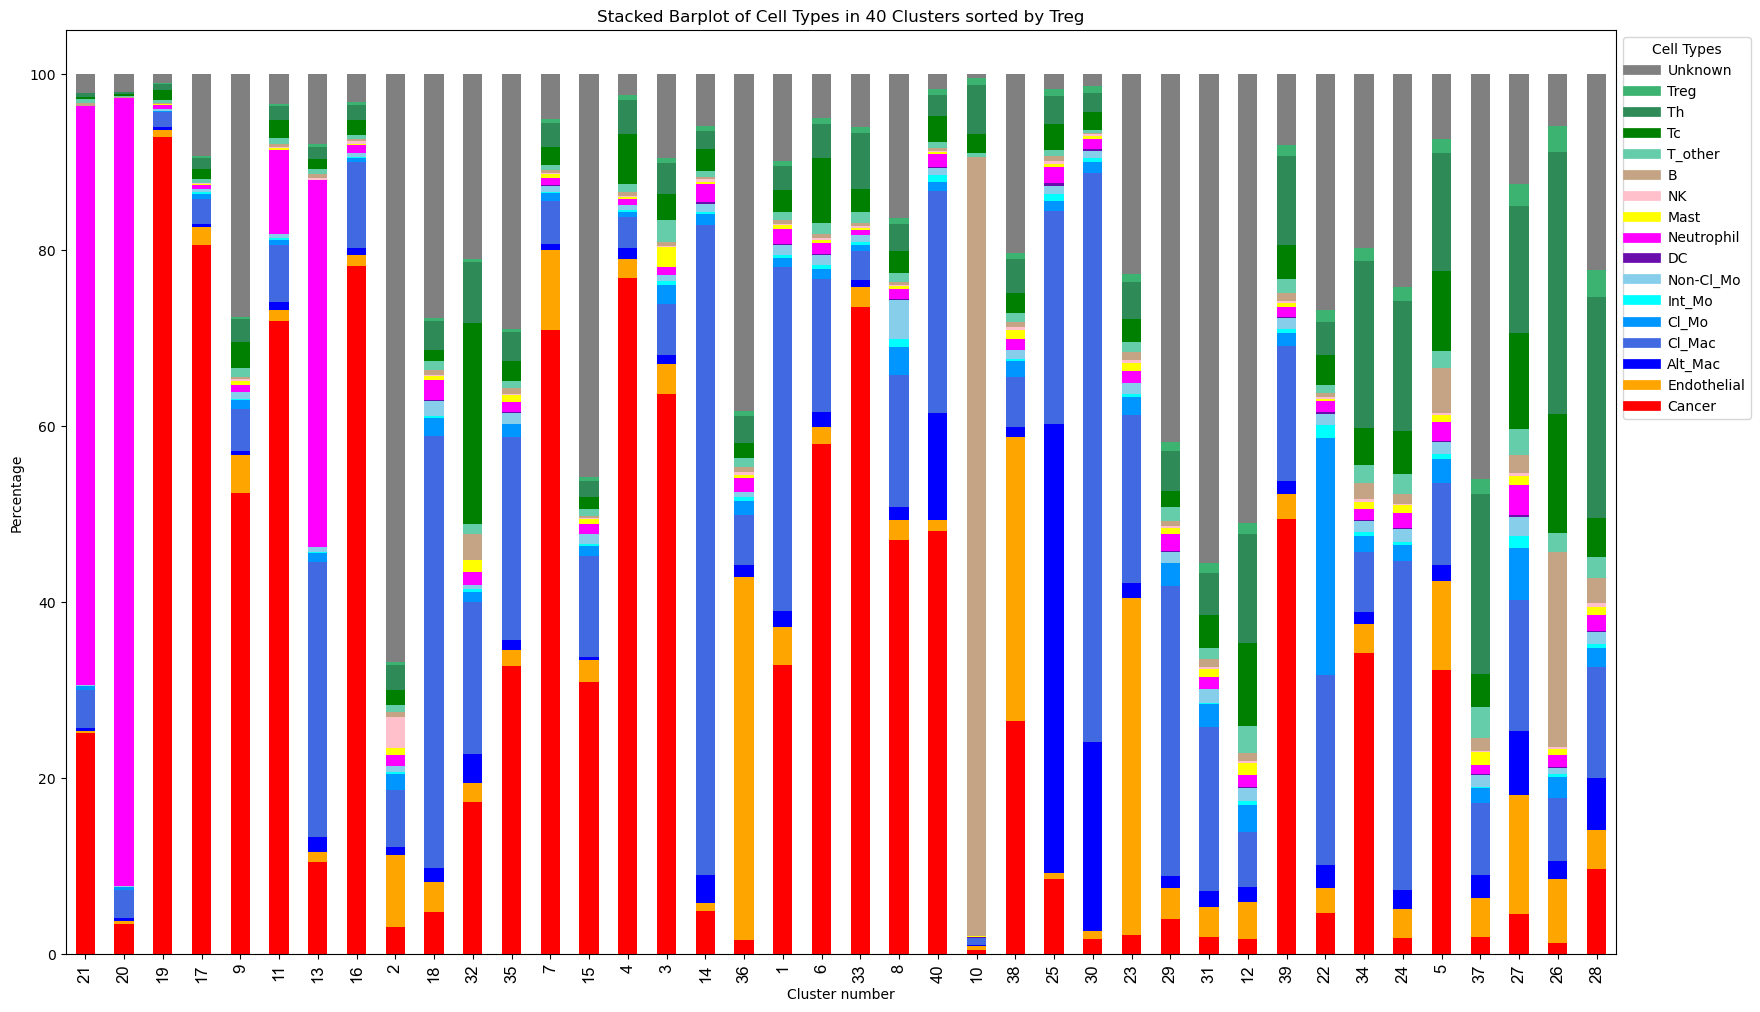

In [31]:
# specify cell type on which to sort
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)

# Add totals for each cell type and each cluster and calculate percentages
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()
result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]
result_percentage = result_percentage.iloc[:-1,:-1].T.reindex(columns=ct_order)

cluster_data = result_percentage
# Plotting
plt.figure(figsize=(20, 10))
ax = result_percentage.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=cell_type_colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=45, fontsize=5)

# Define the order of legend entries
handles = [plt.Line2D([0], [0], color=cell_type_colors[ct], lw=7) for ct in ct_order[::-1]]
labels = ct_order[::-1]

# Show plot
plt.legend(handles, labels, title='Cell Types', bbox_to_anchor=(1, 1))
plt.savefig(f'{data_path}clustering_plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)
plt.show()

<Figure size 2000x1000 with 0 Axes>

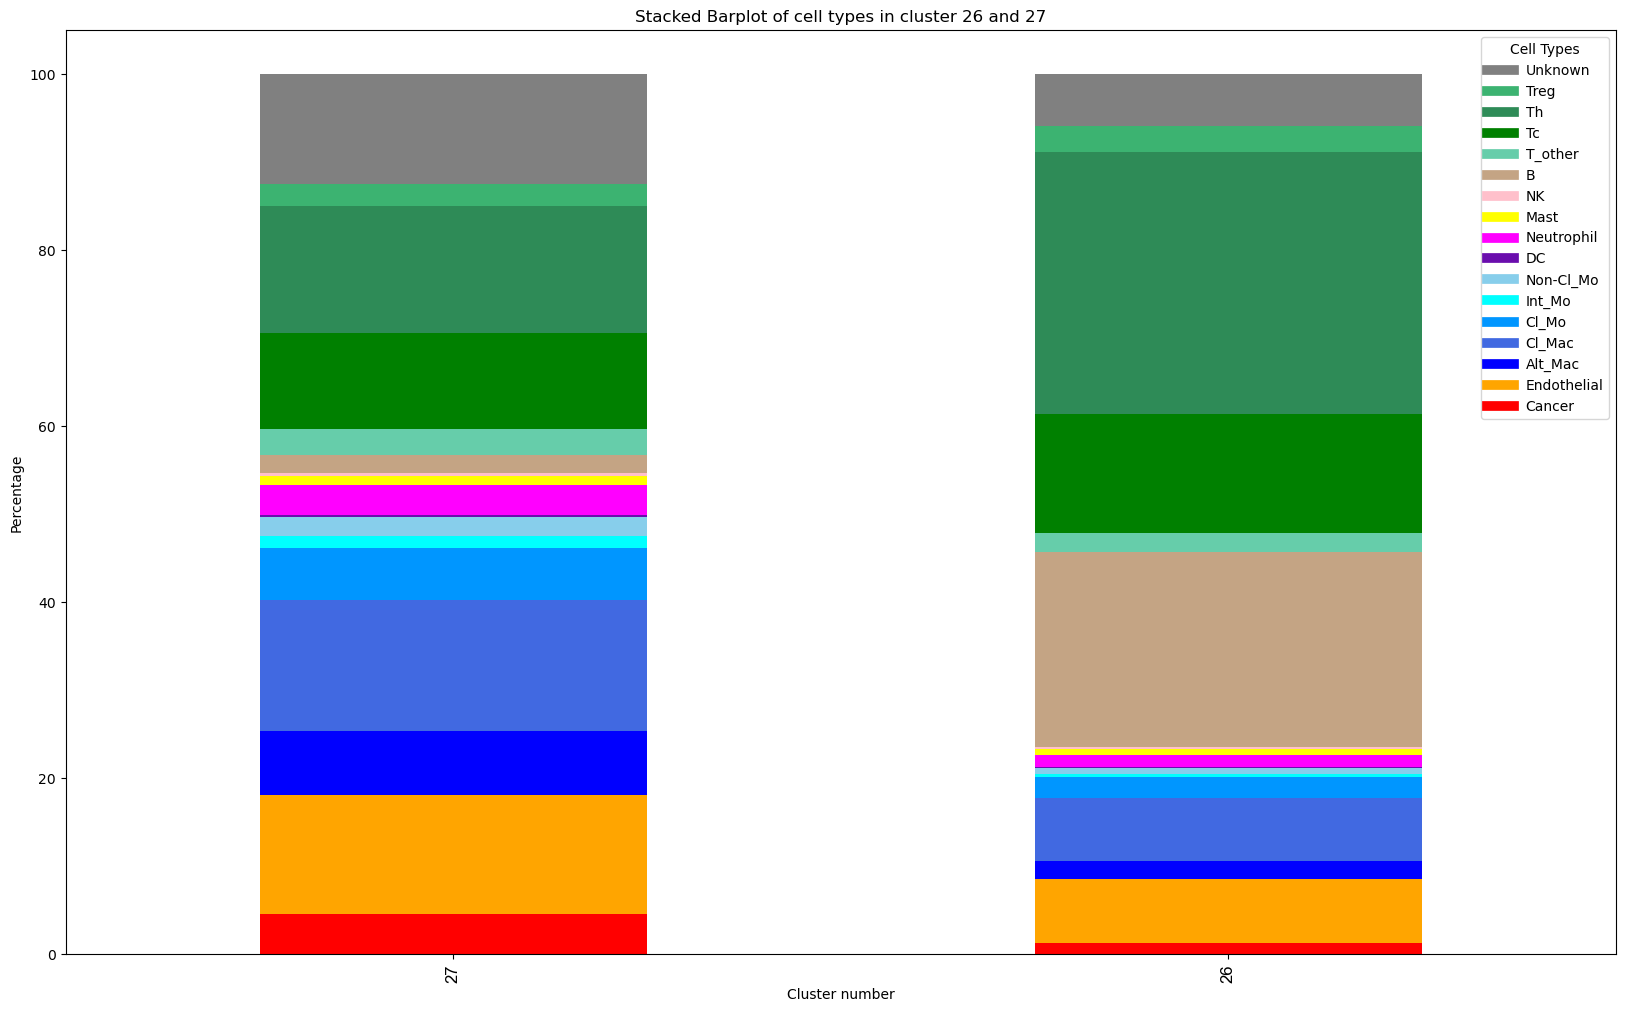

In [32]:

# Plotting
plt.figure(figsize=(20, 10))
ax = result_percentage.iloc[-3:-1].plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=cell_type_colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of cell types in cluster 26 and 27')
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=45, fontsize=5)

# Define the order of legend entries
handles = [plt.Line2D([0], [0], color=cell_type_colors[ct], lw=7) for ct in ct_order[::-1]]
labels = ct_order[::-1]

# Show plot
plt.legend(handles, labels, title='Cell Types', bbox_to_anchor=(1, 1))
plt.savefig(f'{data_path}clustering_plots/stacked_barplot_26_27.png', bbox_inches='tight', dpi=300)
plt.show()

In [50]:
print(sorted_columns)

Index([               21,                20,                19,
                      17,                 9,                11,
                      13,                16,                 2,
                      18,                32,                35,
                       7,                15,                 4,
                       6,                14,                36,
                       3,                 1,                33,
                       8,                10,                38,
                      25,                30,                23,
                      29,                31,                12,
                      39,                22,                34,
                      24,                 5,                37,
                      27,                26,                28,
       'Total_Cell_Type'],
      dtype='object', name='cluster39')


In [27]:
# Annotate entire dataset with clusters after specific clustering k
# Set df
df_cl = average_neighbours21
num_clus = df_cl.iloc[:,-1].max()
key = df_cl[['cluster', f'agglomerateto_{num_clus}']]
merged_df = pd.merge(data, key, on='cluster', how='inner').drop(columns=['cluster', 'Patient_ID', 'source_ID'])
merged_df.rename(columns={f'agglomerateto_{num_clus}': f'cluster{num_clus}'}, inplace=True)


C:\Users\jhroe\AppData\Local\Temp\ipykernel_8520\1119991350.py:16: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]


<Figure size 2000x1000 with 0 Axes>

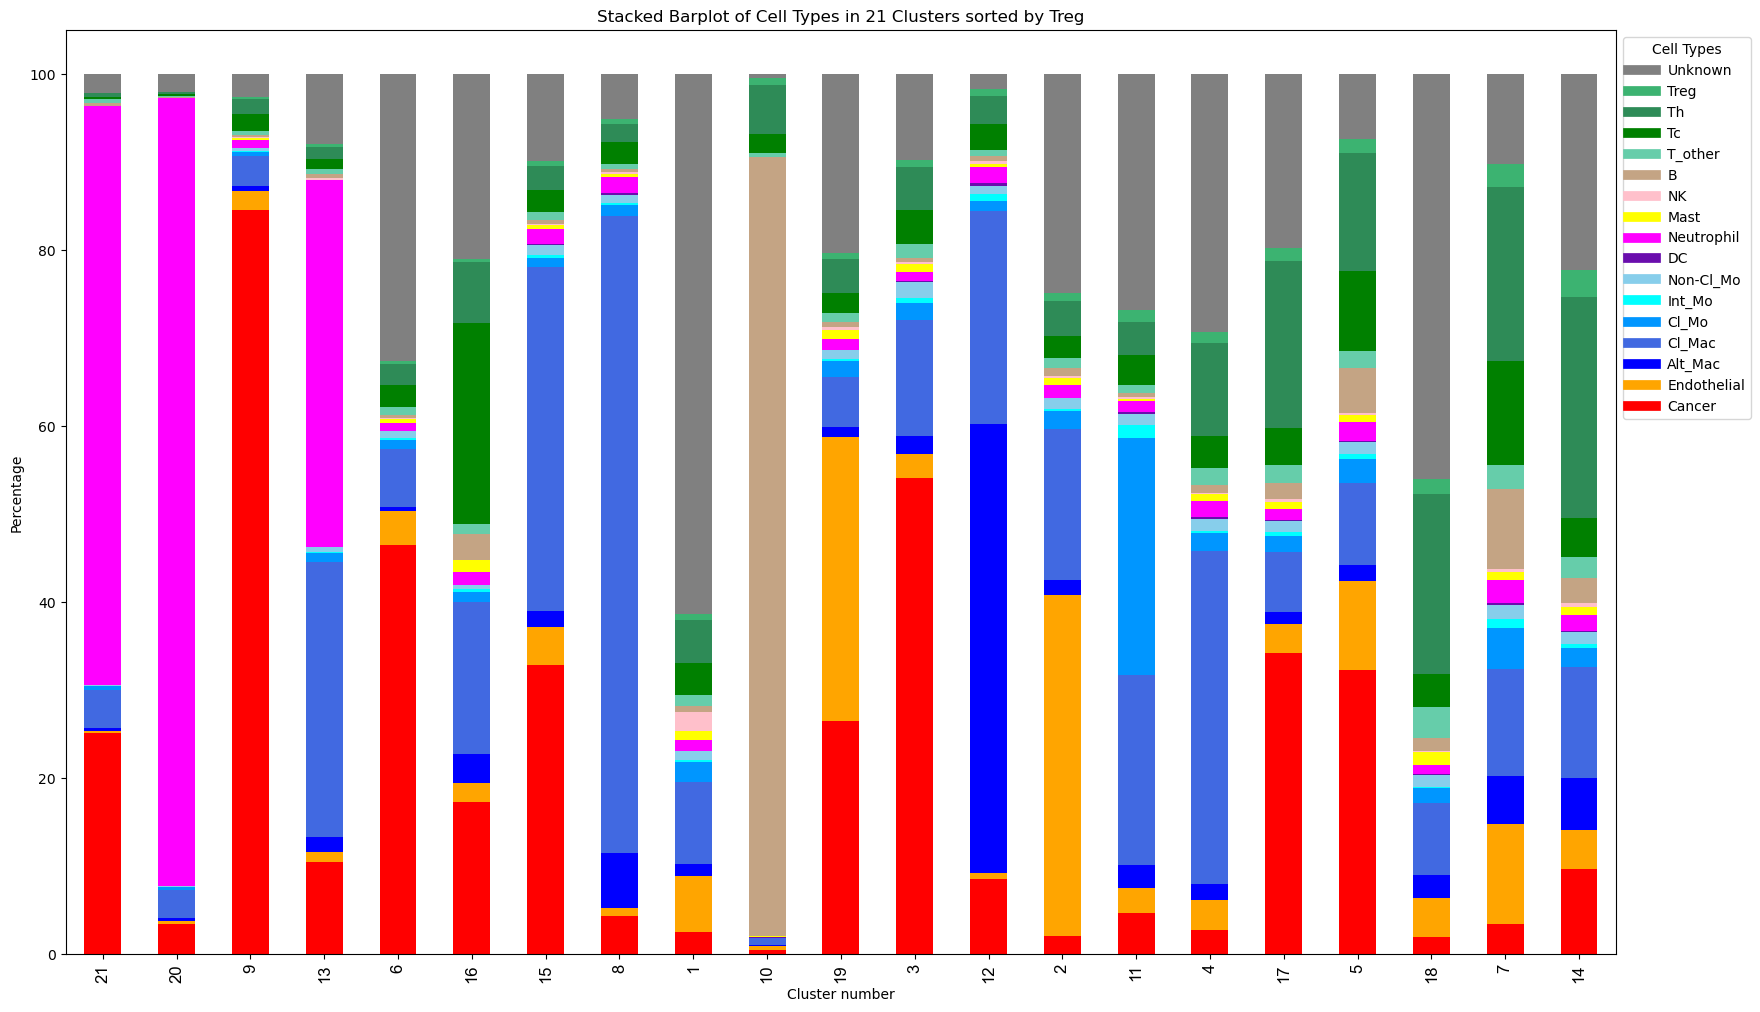

In [28]:
# specify cell type on which to sort
sort_celltype = 'Treg'

# Grouping by 'cluster' and 'celltype' and getting counts
result = merged_df.groupby([f'cluster{num_clus}', 'source_cluster']).size().reset_index(name='Count')

# Pivot the table to get totals per cluster and cell type
result = result.pivot_table(index='source_cluster', columns=f'cluster{num_clus}', values='Count', fill_value=0)

# Add totals for each cell type and each cluster and calculate percentages
result['Total_Cell_Type'] = result.sum(axis=1)
result.loc['Total_Cells'] = result.sum()
result_percentage = result.iloc[:,:-1].div(result.loc['Total_Cells'], axis=1) * 100

# Sort the columns based on the values in the selected row
sorted_columns = result_percentage.columns[result_percentage.loc[sort_celltype].argsort()]

# Reorder the DataFrame based on the sorted columns
result_percentage = result_percentage[sorted_columns]
result_percentage = result_percentage.iloc[:-1,:-1].T.reindex(columns=ct_order)

# Plotting
plt.figure(figsize=(20, 10))
ax = result_percentage.plot(kind='bar', stacked=True, figsize=(20, 12),width=0.5, color=cell_type_colors)
ax.set_ylabel('Percentage')
ax.set_xlabel('Cluster number')
ax.set_title(f'Stacked Barplot of Cell Types in {num_clus} Clusters sorted by {sort_celltype}')
plt.xticks(fontsize=12, fontfamily='Arial', fontweight='normal')

# # Annotate total amount of cells above each bar
# for i, total in enumerate(result.loc['Total_Cells'][:-1]):  # Exclude the 'Total_Cells' row
#     ax.annotate(f'{total}', (i, 100), xytext=(0, 5), textcoords='offset points', ha='center', rotation=45, fontsize=5)

# Define the order of legend entries
handles = [plt.Line2D([0], [0], color=cell_type_colors[ct], lw=7) for ct in ct_order[::-1]]
labels = ct_order[::-1]

# Show plot
plt.legend(handles, labels, title='Cell Types', bbox_to_anchor=(1, 1))
plt.savefig(f'{data_path}clustering_plots/stacked_barplot_clusno_{num_clus}_sorted_{sort_celltype}.png', bbox_inches='tight', dpi=300)
plt.show()

In [34]:
# num_clus = 19
key = average_neighbours21[['cluster', f'agglomerateto_21']]
df_clus = pd.merge(data, key, on='cluster', how='inner')
# num_clus = 39
key = average_neighbours40[['cluster', f'agglomerateto_40']]
df_clus = pd.merge(df_clus, key, on='cluster', how='inner')
# num_clus = 48
key = average_neighbours49[['cluster', f'agglomerateto_49']]
df_clus = pd.merge(df_clus, key, on='cluster', how='inner')


df_clus


,Patient_ID,source_ID,source_cluster,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,...,Non-Cl_Mo,T_other,Tc,Th,Treg,Unknown,cluster,agglomerateto_21,agglomerateto_40,agglomerateto_49
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.0,0.000000,0.166667,0.333333,0.000000,0.000000,1,7,27,27
1,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.285714,0.000000,0.428571,2,17,34,34
2,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.0,0.000000,0.181818,0.090909,0.000000,0.000000,3,5,5,47
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,4,9,7,3
4,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.0,0.083333,0.083333,0.250000,0.000000,0.333333,1,7,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,44,3,39,39
1637718,LUAD_D416,D416_996,Cl_Mac,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,72,3,3,1
1637719,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,146,1,31,31
1637720,LUAD_D416,D416_998,Cl_Mac,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.0,0.000000,0.166667,0.333333,0.000000,0.166667,1,7,27,27


In [35]:
key = average_neighbours49[['cluster', f'agglomerateto_48']]
df_clus = pd.merge(df_clus, key, on='cluster', how='inner')


KeyError: "['agglomerateto_48'] not in index"

In [44]:
clus_key = df_clus.iloc[:,-5:-1].drop_duplicates()
clus_key

,Unknown,cluster,agglomerateto_19,agglomerateto_39
0,0.000000,1,7,27
1,0.428571,2,17,34
2,0.000000,3,1,5
3,0.142857,4,9,7
4,0.333333,1,7,27
...,...,...,...,...
1612485,0.421053,9,11,22
1612651,0.277778,9,11,22
1612657,0.315789,9,11,22
1612661,0.411765,9,11,22


In [33]:
df_clus

NameError: name 'df_clus' is not defined

In [36]:
pi = pd.read_excel('Data/raw/LUAD Clinical Data.xlsx')

def above_5(x):
    if x > 5:
        return 1
    else:
        return 0

pi['surv_5y'] = pi['Survival or loss to follow-up (years)'].apply(lambda x: above_5(x))
s5 = pi[['Key','surv_5y']].rename(columns={"Key":"Patient_ID"})
df_clus = pd.merge(df_clus, s5, on='Patient_ID', how='inner')
df_clus.to_csv(f"{data_path}/clustering/full_cd_clus_21_40_49.csv", index = False)
df_clus


,Patient_ID,source_ID,source_cluster,Alt.MAC,B,Cancer,Cl_Mac,Cl_Mo,DC,Endothelial,...,T_other,Tc,Th,Treg,Unknown,cluster,agglomerateto_21,agglomerateto_40,agglomerateto_49,surv_5y
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,...,0.000000,0.166667,0.333333,0.000000,0.000000,1,7,27,27,1
1,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.285714,0.000000,0.428571,2,17,34,34,1
2,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,...,0.000000,0.181818,0.090909,0.000000,0.000000,3,5,5,47,1
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.142857,4,9,7,3,1
4,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,...,0.083333,0.083333,0.250000,0.000000,0.333333,1,7,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,...,0.000000,0.000000,0.166667,0.000000,0.166667,44,3,39,39,1
1637718,LUAD_D416,D416_996,Cl_Mac,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,72,3,3,1,1
1637719,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.333333,146,1,31,31,1
1637720,LUAD_D416,D416_998,Cl_Mac,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,...,0.000000,0.166667,0.333333,0.000000,0.166667,1,7,27,27,1


In [66]:
cluster_data

source_cluster,Cancer,Endothelial,Alt_Mac,Cl_Mac,Cl_Mo,Int_Mo,Non-Cl_Mo,DC,Neutrophil,Mast,NK,B,T_other,Tc,Th,Treg,Unknown
cluster39,,,,,,,,,,,,,,,,,
21,25.144342,0.173210,0.433025,4.301386,0.404157,0.028868,0.086605,0.028868,65.733256,0.000000,0.028868,0.375289,0.404157,0.259815,0.433025,0.028868,2.136259
20,3.408739,0.309885,0.340874,3.284785,0.278897,0.000000,0.092966,0.030989,89.494887,0.000000,0.000000,0.216920,0.030989,0.309885,0.123954,0.030989,2.045243
19,92.906759,0.734145,0.305694,1.709312,0.119463,0.050600,0.173057,0.014372,0.470368,0.090421,0.059283,0.148206,0.325754,1.069181,0.685641,0.116170,1.021575
17,80.614993,2.016012,0.331150,2.911208,0.473071,0.214702,0.345706,0.010917,0.498544,0.149199,0.036390,0.090975,0.411208,1.153566,1.215429,0.181951,9.344978
9,52.405914,4.348118,0.477151,4.764785,1.014785,0.134409,0.705645,0.013441,0.853495,0.470430,0.127688,0.322581,0.954301,2.963710,2.607527,0.295699,27.540323
11,71.948043,1.284463,0.893697,6.418699,0.658514,0.202620,0.412476,0.065128,9.541211,0.177292,0.108546,0.322020,0.756205,1.990014,1.559447,0.300311,3.361314
13,10.519324,1.099034,1.650564,31.320451,1.010467,0.148953,0.487118,0.036232,41.654589,0.108696,0.193237,0.434783,0.619968,1.062802,1.404992,0.322061,7.926731
16,78.151764,1.315417,0.831490,9.738413,0.407430,0.146342,0.480601,0.033260,0.799894,0.169624,0.342574,0.179602,0.482264,1.739477,1.653003,0.337585,3.191259
2,3.040015,8.186064,1.007234,6.427983,1.831334,0.183133,0.686750,0.082410,1.153740,0.842414,3.461221,0.631810,0.787474,1.748924,2.792785,0.357110,66.779599


In [108]:
cluster_data

source_cluster,Cancer,Endothelial,Alt_Mac,Cl_Mac,Cl_Mo,Int_Mo,Non-Cl_Mo,DC,Neutrophil,Mast,NK,B,T_other,Tc,Th,Treg,Unknown
cluster39,,,,,,,,,,,,,,,,,
21,25.144342,0.173210,0.433025,4.301386,0.404157,0.028868,0.086605,0.028868,65.733256,0.000000,0.028868,0.375289,0.404157,0.259815,0.433025,0.028868,2.136259
20,3.408739,0.309885,0.340874,3.284785,0.278897,0.000000,0.092966,0.030989,89.494887,0.000000,0.000000,0.216920,0.030989,0.309885,0.123954,0.030989,2.045243
19,92.906759,0.734145,0.305694,1.709312,0.119463,0.050600,0.173057,0.014372,0.470368,0.090421,0.059283,0.148206,0.325754,1.069181,0.685641,0.116170,1.021575
17,80.614993,2.016012,0.331150,2.911208,0.473071,0.214702,0.345706,0.010917,0.498544,0.149199,0.036390,0.090975,0.411208,1.153566,1.215429,0.181951,9.344978
9,52.405914,4.348118,0.477151,4.764785,1.014785,0.134409,0.705645,0.013441,0.853495,0.470430,0.127688,0.322581,0.954301,2.963710,2.607527,0.295699,27.540323
11,71.948043,1.284463,0.893697,6.418699,0.658514,0.202620,0.412476,0.065128,9.541211,0.177292,0.108546,0.322020,0.756205,1.990014,1.559447,0.300311,3.361314
13,10.519324,1.099034,1.650564,31.320451,1.010467,0.148953,0.487118,0.036232,41.654589,0.108696,0.193237,0.434783,0.619968,1.062802,1.404992,0.322061,7.926731
16,78.151764,1.315417,0.831490,9.738413,0.407430,0.146342,0.480601,0.033260,0.799894,0.169624,0.342574,0.179602,0.482264,1.739477,1.653003,0.337585,3.191259
2,3.040015,8.186064,1.007234,6.427983,1.831334,0.183133,0.686750,0.082410,1.153740,0.842414,3.461221,0.631810,0.787474,1.748924,2.792785,0.357110,66.779599


In [98]:
cluster_data

source_cluster,Cancer,Endothelial,Alt_Mac,Cl_Mac,Cl_Mo,Int_Mo,Non-Cl_Mo,DC,Neutrophil,Mast,NK,B,T_other,Tc,Th,Treg,Unknown
cluster39,,,,,,,,,,,,,,,,,
21,25.144342,0.173210,0.433025,4.301386,0.404157,0.028868,0.086605,0.028868,65.733256,0.000000,0.028868,0.375289,0.404157,0.259815,0.433025,0.028868,2.136259
20,3.408739,0.309885,0.340874,3.284785,0.278897,0.000000,0.092966,0.030989,89.494887,0.000000,0.000000,0.216920,0.030989,0.309885,0.123954,0.030989,2.045243
19,92.906759,0.734145,0.305694,1.709312,0.119463,0.050600,0.173057,0.014372,0.470368,0.090421,0.059283,0.148206,0.325754,1.069181,0.685641,0.116170,1.021575
17,80.614993,2.016012,0.331150,2.911208,0.473071,0.214702,0.345706,0.010917,0.498544,0.149199,0.036390,0.090975,0.411208,1.153566,1.215429,0.181951,9.344978
9,52.405914,4.348118,0.477151,4.764785,1.014785,0.134409,0.705645,0.013441,0.853495,0.470430,0.127688,0.322581,0.954301,2.963710,2.607527,0.295699,27.540323
11,71.948043,1.284463,0.893697,6.418699,0.658514,0.202620,0.412476,0.065128,9.541211,0.177292,0.108546,0.322020,0.756205,1.990014,1.559447,0.300311,3.361314
13,10.519324,1.099034,1.650564,31.320451,1.010467,0.148953,0.487118,0.036232,41.654589,0.108696,0.193237,0.434783,0.619968,1.062802,1.404992,0.322061,7.926731
16,78.151764,1.315417,0.831490,9.738413,0.407430,0.146342,0.480601,0.033260,0.799894,0.169624,0.342574,0.179602,0.482264,1.739477,1.653003,0.337585,3.191259
2,3.040015,8.186064,1.007234,6.427983,1.831334,0.183133,0.686750,0.082410,1.153740,0.842414,3.461221,0.631810,0.787474,1.748924,2.792785,0.357110,66.779599


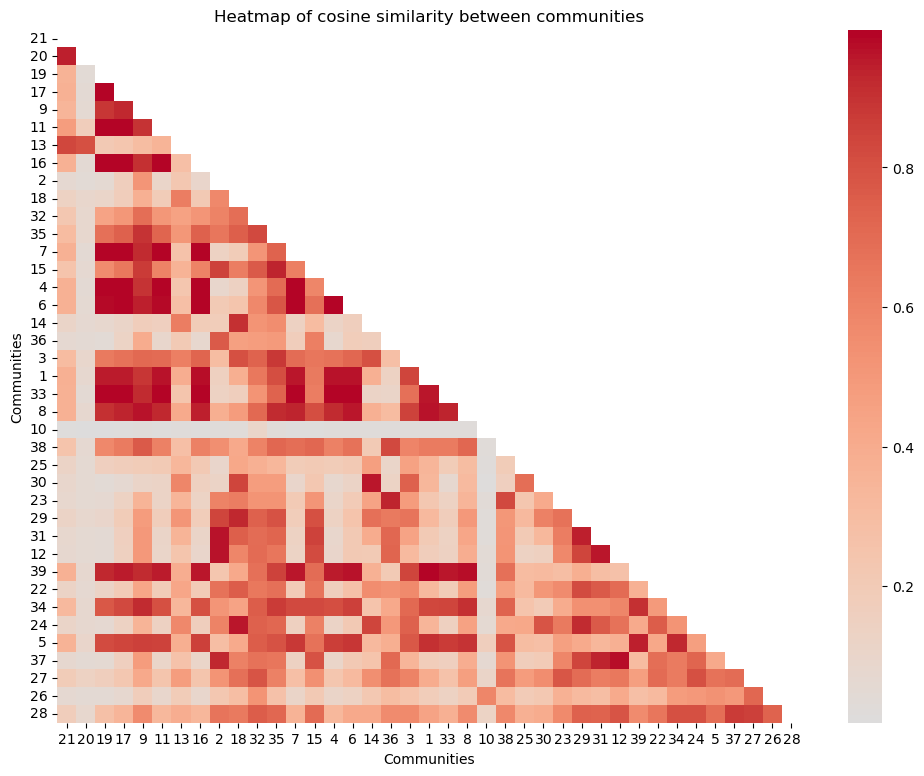

In [97]:

# Calculate the correlation matrix
cosine_sim_matrix = cosine_similarity(cluster_data)
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=cluster_data.index, columns=cluster_data.index)

# Create the heatmap
plt.figure(figsize=(12, 9))
mask = np.triu(np.ones_like(cosine_sim_df, dtype=bool))

heatmap = sns.heatmap(cosine_sim_df, cmap='coolwarm', center=0, mask=mask)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.xlabel('Communities')
plt.ylabel('Communities')

plt.title('Heatmap of cosine similarity between communities')
plt.savefig(f'{data_path}clustering_plots/cossim_heatmap_comms.png', bbox_inches='tight', dpi=300)

plt.show()
# cosine_sim_df

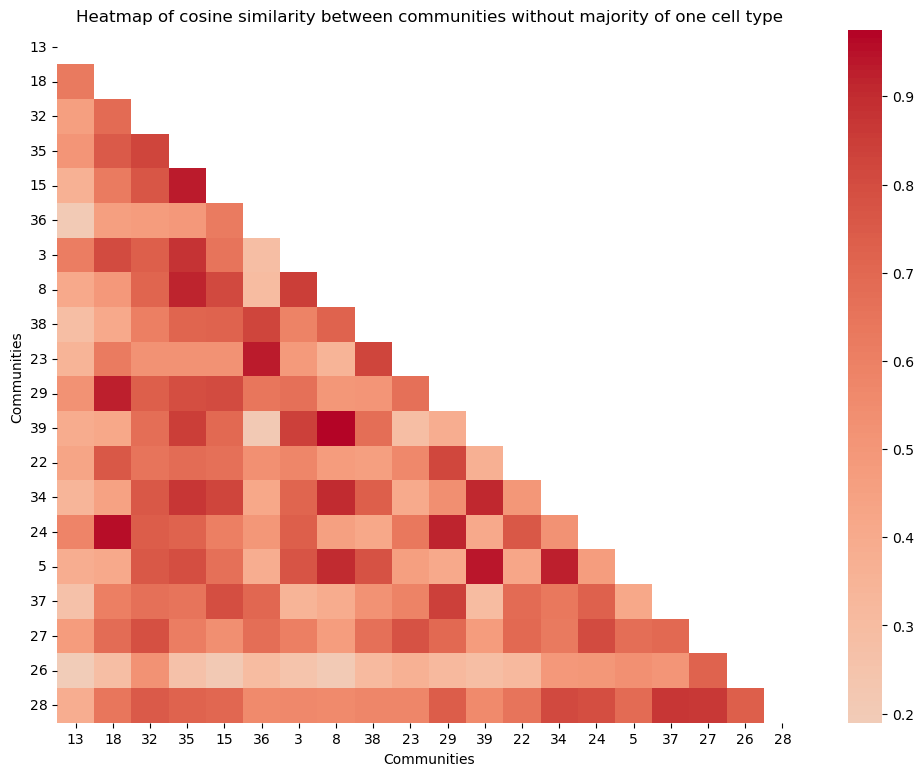

In [107]:
cell_frac_threshold = 50
cluster_data_filt = cluster_data[(cluster_data < cell_frac_threshold).all(axis=1)]

# Calculate the correlation matrix
cosine_sim_matrix = cosine_similarity(cluster_data_filt)
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=cluster_data_filt.index, columns=cluster_data_filt.index)

# Create the heatmap
plt.figure(figsize=(12, 9))
mask = np.triu(np.ones_like(cosine_sim_df, dtype=bool))

heatmap = sns.heatmap(cosine_sim_df, cmap='coolwarm', center=0, mask=mask)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.xlabel('Communities')
plt.ylabel('Communities')

plt.title('Heatmap of cosine similarity between communities without majority of one cell type')
plt.savefig(f'{data_path}clustering_plots/cossim_heatmap_comms_50t.png', bbox_inches='tight', dpi=300)

plt.show()
# cosine_sim_df
